In [1]:
# Dependencies
import tweepy
import pandas as pd
import requests as req
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from config import api

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [9]:
# Target Users
target_users = ["@BBCWorld", "@CNN", "@CBSNews",
                "@FOXNews", "@nytimesworld"]

# Create empty data list to hold a dictionary of info per tweet
TW_data = []

# Create empty data list to hold a dictionary of composites per target user
TW_sentiments = []  

# Loop through all target users
for target in target_users:

    # Variables for holding tweet sentiments
    compound_sentiments = []
    
    # Run search around each tweet
    public_tweets = api.user_timeline(target, count=100)

    # Loop through all tweets
    for tweet in public_tweets:

        # Pull tweet's text and date
        text = tweet["text"]
        date = tweet["created_at"]
            
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]

        # Store the Sentiments analysis values
        sentiment = {"User": target,
                     "Date": date,
                     "Text": text,
                     "Compound": compound,
                     "Positive": pos,
                     "Neutral": neg,
                     "Negative": neu}
        # Add dictionary to tweet data list
        TW_data.append(sentiment)
            
        # Add dictionary of scores to list
        compound_sentiments.append(compound)

# Create dictionary with list of composite scores
TW_sentiments.append({"User":target,"Compound":np.mean(compound_sentiments)})
 

In [10]:
print(TW_sentiments[:5])

[{'User': '@nytimesworld', 'Compound': -0.05619}]


In [11]:
# Create a dataframe from the collected data
tweet_data = pd.DataFrame(TW_data)
sentiment_only_data = pd.DataFrame(TW_sentiments)

# Reorganize columns
#tweet_data = tweet_data[["User","Date","Text","Compound","Positive","Neutral","Negative"]]

# Save to CSV
tweet_data.to_csv("News_Mood.csv")
sentiment_only_data.to_csv("Compound Sentiment only data.csv")

# Show head to confirm formatting
tweet_data.head(0)
sentiment_only_data.head()

,Compound,User
0,-0.05619,@nytimesworld


ValueError: x and y must be the same size

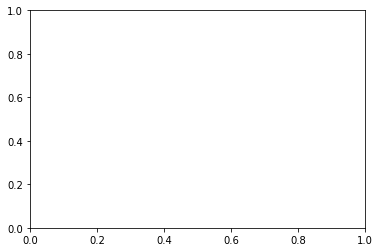

In [12]:
# Create a list of 0-100 for "Tweets Ago" x-axis
x_values = list(range(0,101))

# Plot each list of composite scores
plt.scatter(x_values,tweet_data.loc[0:,"Compound"],facecolors="red",edgecolor="black")
plt.scatter(x_values,tweet_data.loc[1:,"Compound"],facecolors="dodgerblue",edgecolor="black")
plt.scatter(x_values,tweet_data.loc[2:,"Compound"],facecolors="yellow",edgecolor="black")
plt.scatter(x_values,tweet_data.loc[3:,"Compound"],facecolors="green",edgecolor="black")
plt.scatter(x_values,tweet_data.loc[4:,"Compound"],facecolors="purple",edgecolor="black")

# Set title and axis labels
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Set legend to outside the plot, save plot to .png
plt.legend(target_users,bbox_to_anchor=(1,1))
plt.savefig("news_mood_scatter.png")
plt.show()

In [13]:
# Create list of average composite score from each user
averages = [np.mean(TW_sentiments[x]["Compound"]) for x in list(range(5))]

# Chart each average
chart = plt.bar(target_users,averages)
chart[0].set_color("red")
chart[1].set_color("dodgerblue")
chart[2].set_color("yellow")
chart[3].set_color("green")
chart[4].set_color("purple")

#Create title and labels, save to .png
plt.title("Overall Media Sentiment based on Twitter")
plt.ylabel("Aggregate Polarity")
plt.legend(target_users,bbox_to_anchor=(1,1))
plt.savefig("news_mood_bar.png")
plt.show()

IndexError: list index out of range